In [820]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import collections
import pandas as pd
import csv
import re
import wordcloud as w
from wordcloud import STOPWORDS
from matplotlib.pyplot import figure

In [10]:
# Import the data from cleansing
with open('data_bk2_af_drop_time.csv','r') as f:
    df = pd.read_csv(f)

In [104]:
pd.set_option('display.max_columns', 500)

In [186]:
df = df.fillna('unknown')

In [741]:
df

,asst_id,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country,repetition,contract_dur_wk,mnf_contract_wk,contact_contract_wk,mn_year,contract_st_year,contact_year,tenure_group
0,0,Laptops,201726,201726,202125,201840,VOICE,unknown,unknown,"Hard Drive, Documentation(2)",Hard,0,3,1018.0,0,Not_USED,unknown,Hogwarts,Zonko's Joke Shop,1,207,0,66,2017,2017,2018,1.0
1,1,Laptops,201650,201650,201949,201840,VOICE,unknown,unknown,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,unknown,Hogwarts,Zonko's Joke Shop,1,155,0,94,2016,2016,2018,1.0
2,2,Laptops,201821,201821,202222,201840,VOICE,unknown,unknown,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop,1,209,0,19,2018,2018,2018,1.0
3,3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,unknown,Hogwarts,Zonko's Joke Shop,1,156,0,136,2016,2016,2018,1.0
4,4,Laptops,201732,201732,202032,201840,VOICE,unknown,unknown,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,unknown,Hogwarts,Zonko's Joke Shop,1,156,0,60,2017,2017,2018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78607,82435,Laptops,201825,201825,202126,201840,VOICE,System Board Components,Booting,"Motherboard, Miscellaneous(2), Documentation",Hard,0,4,720.0,1,Effective_Usage,unknown,Hogwarts,Zonko's Joke Shop,1,157,0,15,2018,2018,2018,1.0
78608,82436,Laptops,201652,201652,201952,201840,CHAT,System Board Components,unknown,"Motherboard, Miscellaneous(2), Heatsink, Fan A...",Hard,0,6,837.0,0,Not_USED,unknown,Hogwarts,Zonko's Joke Shop,1,156,0,92,2016,2016,2018,1.0
78609,82438,Laptops,201832,201832,201946,201840,VOICE,Information Status,Booting,unknown,Soft,0,0,325.0,0,Not_USED,unknown,Middle Earth,Lorien,1,66,0,8,2018,2018,2018,1.0
78610,82439,Laptops,201710,201710,201809,201840,VOICE,System Board Components,unknown,"Miscellaneous(2), Chassis, Cables",Hard,0,4,1901.0,0,Not_USED,unknown,Hogwarts,Zonko's Joke Shop,1,51,0,82,2017,2017,2018,1.0


In [562]:
df.dtypes

asst_id                  int64
product_type            object
mnfture_wk               int64
contract_st              int64
contract_end             int64
contact_wk               int64
contact_type            object
issue_type              object
topic_category          object
parts_sent              object
repair_type             object
repeat_ct                int64
parts_ct                 int64
agent_tenure_indays    float64
contact_manager_flg      int64
diagnostics             object
repeat_parts_sent       object
region                  object
country                 object
repetition               int64
contract_dur_wk          int64
mnf_contract_wk          int64
contact_contract_wk      int64
mn_year                  int64
contract_st_year         int64
contact_year             int64
dtype: object

In [707]:
# QC the numerical attributes
df.describe()

,asst_id,mnfture_wk,contract_st,contract_end,contact_wk,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,repetition,contract_dur_wk,mnf_contract_wk,contact_contract_wk,mn_year,contract_st_year,contact_year,tenure_group
count,78612.000000,78612.000000,78612.000000,78612.000000,78612.0,78612.000000,78612.000000,78612.000000,78612.000000,78612.000000,78612.000000,78612.000000,78612.000000,78612.000000,78612.000000,78612.0,78612.000000
mean,41251.568374,201666.731886,201669.100735,201948.670394,201840.0,0.073360,1.162940,986.799267,0.011983,1.017427,145.605378,1.280771,95.043365,2016.397000,2016.419669,2018.0,1.104577
std,23802.825138,155.312928,155.927313,187.076287,0.0,0.261216,1.558369,858.242554,0.108809,0.152163,78.084966,7.986316,80.963048,1.568211,1.573769,0.0,0.399960
min,0.000000,201001.000000,201001.000000,201102.000000,201840.0,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000,2010.000000,2010.000000,2018.0,1.000000
25%,20656.750000,201610.000000,201611.000000,201902.000000,201840.0,0.000000,0.000000,536.000000,0.000000,1.000000,65.000000,0.000000,33.000000,2016.000000,2016.000000,2018.0,1.000000
50%,41269.500000,201715.000000,201718.000000,201937.000000,201840.0,0.000000,1.000000,806.000000,0.000000,1.000000,156.000000,0.000000,74.000000,2017.000000,2017.000000,2018.0,1.000000
75%,61855.250000,201805.000000,201807.000000,202042.000000,201840.0,0.000000,2.000000,1018.000000,0.000000,1.000000,183.000000,0.000000,133.000000,2018.000000,2018.000000,2018.0,1.000000
max,82441.000000,201840.000000,201840.000000,202953.000000,201840.0,3.000000,51.000000,8922.000000,1.000000,7.000000,961.000000,276.000000,455.000000,2018.000000,2018.000000,2018.0,5.000000


In [540]:
# Extract Year Information for manufacturing, Warrenty Start and Contact
df['mn_year'] = df['mnfture_wk']//100
df['contract_st_year'] = df['contract_st']//100
df['contact_year']= df['contact_wk']//100

In [543]:
df.groupby(['mn_year'])['mn_year'].count()

mn_year
2010      441
2011      850
2012     1301
2013     1809
2014     3454
2015     9639
2016    17213
2017    22527
2018    21378
Name: mn_year, dtype: int64

In [481]:
df.groupby(['contract_st_year'])['contract_st_year'].count()

contract_st_year
2010      429
2011      849
2012     1285
2013     1823
2014     3412
2015     9582
2016    16834
2017    21971
2018    22427
Name: contract_st_year, dtype: int64

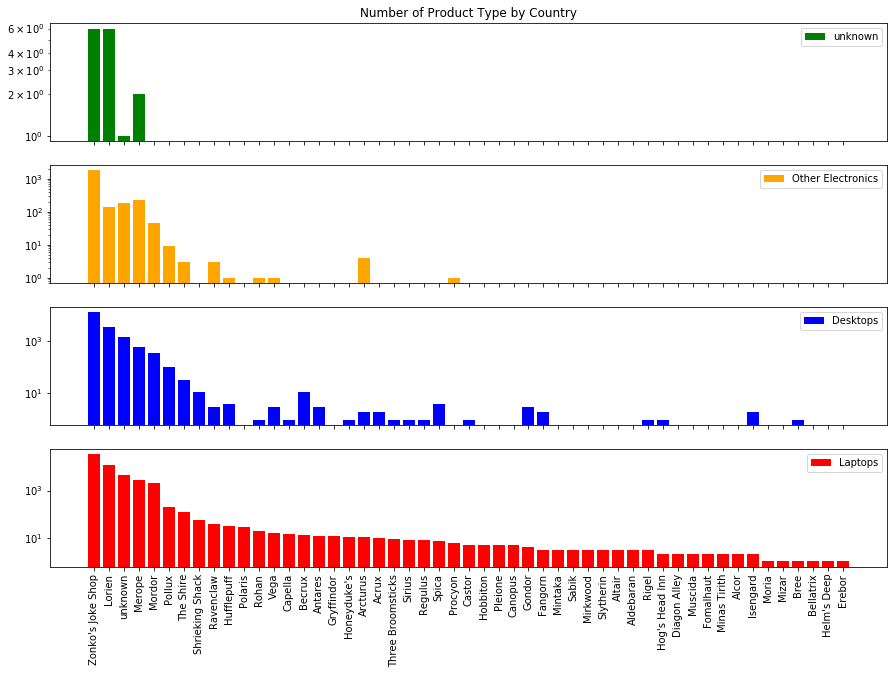

In [1049]:
# Plot number of different product type by Countries

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
ax1.title.set_text('Number of Product Type by Country')
i = 0
ptypes = ['Laptops','Desktops','Other Electronics','unknown']
color = ['r','b','orange','g']
ptypes.reverse()
color.reverse()
for a in (ax1,ax2,ax3,ax4):
    a.bar(s1.index, s1[ptypes[i]], label = ptypes[i], color=color[i])
    i+=1
    a.set_yscale('log')
    a.legend(loc = 'upper right')

plt.xticks(rotation=90);
plt.savefig('product_type_by_country.png')

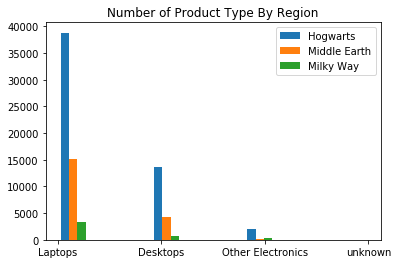

In [1071]:
# Print sales numbers for different product type in different regions

x = [list(df[df['region'] == 'Hogwarts']['product_type']),\
    list(df[df['region'] == 'Middle Earth']['product_type']),\
    list(df[df['region'] == 'Milky Way']['product_type'])]

labels = ['Hogwarts','Middle Earth','Milky Way']
plt.hist(x, stacked=False,histtype='bar', label=labels)
plt.legend()
plt.title('Number of Product Type By Region')
#plt.yscale('log', nonposy='clip')
plt.savefig('product_type_by_region.png')

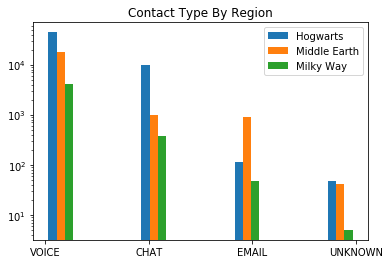

In [99]:
# Print numbers for different contact type by different regions

x = [list(df[df['region'] == 'Hogwarts']['contact_type']),\
    list(df[df['region'] == 'Middle Earth']['contact_type']),\
    list(df[df['region'] == 'Milky Way']['contact_type'])]

labels = ['Hogwarts','Middle Earth','Milky Way']
plt.hist(x, stacked=False,histtype='bar', label=labels)
plt.legend()
plt.title('Contact Type By Region')
plt.yscale('log', nonposy='clip')

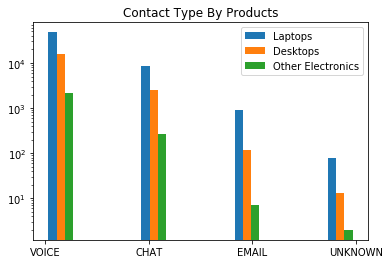

In [316]:
# Print numbers for different contact type by different regions

x = [list(df[df['product_type'] == 'Laptops']['contact_type']),\
    list(df[df['product_type'] == 'Desktops']['contact_type']),\
    list(df[df['product_type'] == 'Other Electronics']['contact_type'])]

labels = ['Laptops','Desktops','Other Electronics']
plt.hist(x, stacked=False,histtype='bar', label=labels)
plt.legend()
plt.title('Contact Type By Products')
plt.yscale('log', nonposy='clip')

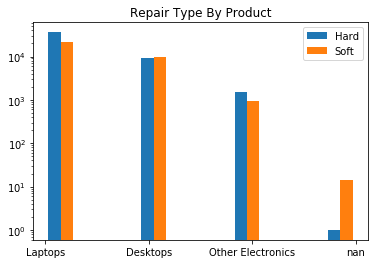

In [106]:
# Print sales numbers for different product type in different regions

x = [list(df[df['repair_type'] == 'Hard']['product_type']),\
    list(df[df['repair_type'] == 'Soft']['product_type'])]

labels = ['Hard','Soft']
plt.hist(x, stacked=False,histtype='bar', label=labels)
plt.legend()
plt.title('Repair Type By Product')
plt.yscale('log', nonposy='clip')

In [769]:
# Issue Type Frequency QC
total_line = len(df)
isu_type_dict = dict(zip(collections.Counter(df['issue_type']).keys(), tuple(zip(collections.Counter(df['issue_type']).values(), \
          np.array(list(collections.Counter(df['issue_type']).values()))/total_line))))
srt1 = sorted(isu_type_dict.items(), key = lambda a: a[1][0], reverse=True)
srt1[:10]

[('unknown', (11358, 0.14448175851015113)),
 ('System Board Components', (10188, 0.12959853457487405)),
 ('Fee Based Support', (8177, 0.10401719839210298)),
 ('Operating System', (7550, 0.09604131684730066)),
 ('Hard Drive', (6759, 0.08597923981071592)),
 ('Audio, Video, Speakers, TV Tuner', (6482, 0.08245560474227853)),
 ('Input Device / Webcam', (4549, 0.057866483488525924)),
 ('Power Subsystem / Cables / AC Adapter', (4085, 0.05196407673128784)),
 ('Contract or Service Issue', (3279, 0.041711189131430314)),
 ('Mechanical Chassis / Rack', (2390, 0.03040248308146339))]

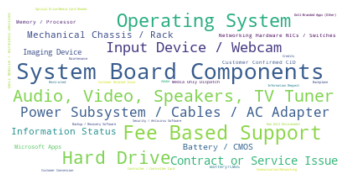

In [838]:
# Plot Word Cloud to QC Issue Type
srt1_count = dict(zip([x[0] for x in srt1],[x[1][1] for x in srt1]))
del srt1_count['unknown']
wcd = w.WordCloud(background_color = 'white',relative_scaling = 0.5).generate_from_frequencies(srt1_count)

plt.imshow(wcd, interpolation= 'bilinear')
#figure(figsize=(8, 6), dpi=80)
plt.axis("off")
plt.savefig('wordcloud_test.png')
plt.show()

(0, 0.1684780949473363)

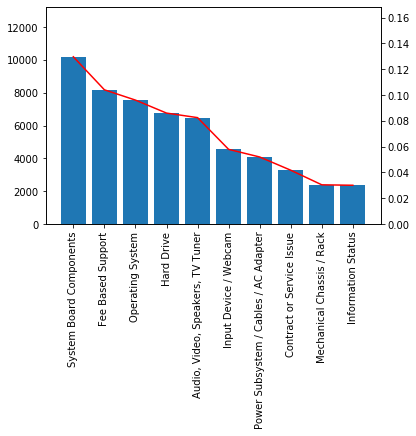

In [863]:
# Plot the top 10 issues exluding the unknown

list_count = [x[1][0] for x in srt1[1:11]]
list_perc = [x[1][1] for x in srt1[1:11]]

fig, ax = plt.subplots()
plt.xticks(rotation = 90)
ax2 = ax.twinx()
ax.bar([x[0] for x in srt1[1:11]], list_count )

ax2.plot([x[0] for x in srt1[1:11]], list_perc , color ='r')
ax.set_ylim(0,1.3*max(list_count))
ax2.set_ylim(0,1.3*max(list_perc))

In [1101]:
# Creat a function to rank target category number by different segmentation
# for example, rank the different issue count group by different product type
# Generate a word cloud to display all the issues for each segmentation
# Generate bar chart for top rank items for each segmentation

def ranking_QC(segment:str,target:str,rank:int = 10, plot_wordcloud = False, plot_bar = False):
    for i in df[segment].unique():
        total_line = len(df[df[segment] == i])
        isu_type_dict = dict(zip(collections.Counter(df[df[segment] == i][target]).keys(), \
                                 tuple(zip(collections.Counter(df[df[segment] == i][target]).values(), \
                  np.array(list(collections.Counter(df[df[segment] == i][target]).values()))/total_line))))
        srt1 = sorted(isu_type_dict.items(), key = lambda a: a[1][0], reverse=True)

        print('\033[1m'+'Segmentation:',i,'\033[0m')
        for j in range(min(rank,len(srt1))):
            print(srt1[j])
        print()
        
        srt1 = [x for x in srt1 if x[0] != 'unknown']
        
        if plot_wordcloud:
            #plot the word cloud
            srt1_count = dict(zip([x[0] for x in srt1],[x[1][1] for x in srt1]))
            
            wcd = w.WordCloud(background_color = 'white',relative_scaling = 0.5).generate_from_frequencies(srt1_count)
            plt.imshow(wcd, interpolation= 'bilinear')
            plt.title('Word Cloud of '+ target + ' for ' + str(i))
            plt.axis("off")
            plt.savefig('wordcloud_'+ target + '_'+ str(i) +'_'+ segment +'.png')
            plt.show()
         
        if plot_bar:
            # plot bar chart for the top rank items           
            list_count = [x[1][0] for x in srt1[:rank]]
            list_perc = [x[1][1] for x in srt1[:rank]]

            fig, ax = plt.subplots()
            plt.xticks(rotation = 90)
            plt.title('Bar Chart of Top '+str(rank) +' '+ target + ' for ' + str(i))
            ax2 = ax.twinx()
            ax.bar([x[0] for x in srt1[:rank]], list_count )

            ax2.plot([x[0] for x in srt1[:rank]], list_perc , color ='r')
            ax.set_ylim(0,1.3*max(list_count))
            ax2.set_ylim(0,1.3*max(list_perc))
            plt.savefig('bar_r'+str(rank)+'_'+ target +'_'+ str(i) +'_'+ segment +'.png', bbox_inches = "tight")
            plt.show()

Segmentation: Laptops 
('unknown', (9056, 0.15764918877515494))
('System Board Components', (7774, 0.1353318014065873))
('Fee Based Support', (5292, 0.09212450386463338))
('Operating System', (5100, 0.08878211823689158))
('Audio, Video, Speakers, TV Tuner', (5095, 0.08869507694450247))
('Hard Drive', (4162, 0.07245317178469465))
('Input Device / Webcam', (3494, 0.06082445512150964))
('Power Subsystem / Cables / AC Adapter', (3118, 0.054278949933848616))
('Contract or Service Issue', (2609, 0.04541814636863728))
('Mechanical Chassis / Rack', (2113, 0.03678365016363763))



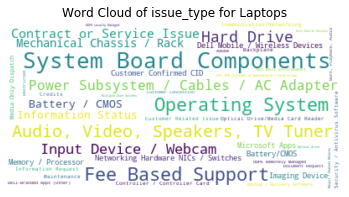

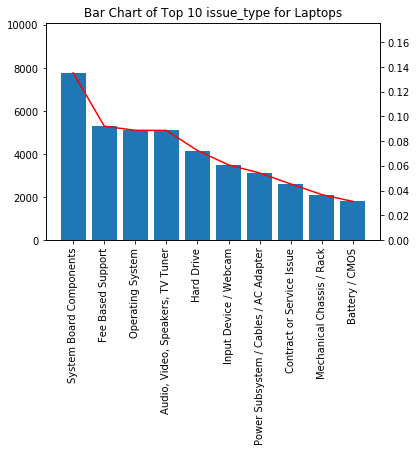

Segmentation: Desktops 
('Fee Based Support', (2860, 0.1527859394198408))
('Hard Drive', (2560, 0.13675944227789946))
('Operating System', (2426, 0.12960094022116567))
('System Board Components', (2261, 0.12078636679309793))
('unknown', (1609, 0.0859554463379454))
('Audio, Video, Speakers, TV Tuner', (1105, 0.05903093113948395))
('Input Device / Webcam', (1002, 0.05352850045408408))
('Power Subsystem / Cables / AC Adapter', (918, 0.04904108125434051))
('Information Status', (642, 0.03429670388375448))
('Contract or Service Issue', (612, 0.03269405416956034))



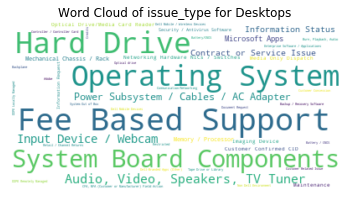

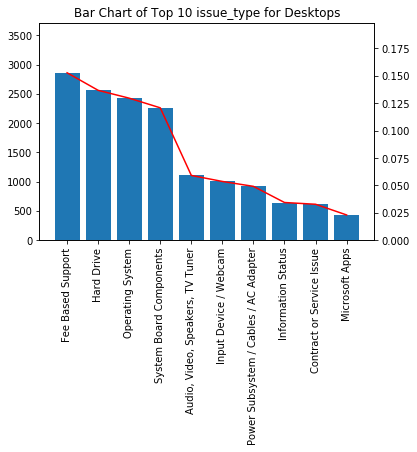

Segmentation: Other Electronics 
('Imaging Device', (868, 0.35661462612982747))
('unknown', (693, 0.2847165160230074))
('Audio, Video, Speakers, TV Tuner', (282, 0.11585866885784717))
('System Board Components', (153, 0.0628594905505341))
('Contract or Service Issue', (58, 0.0238290879211175))
('Information Status', (57, 0.02341824157764996))
('Input Device / Webcam', (51, 0.0209531635168447))
('Power Subsystem / Cables / AC Adapter', (49, 0.020131470829909615))
('Hard Drive', (36, 0.014790468364831553))
('Mechanical Chassis / Rack', (34, 0.013968775677896467))



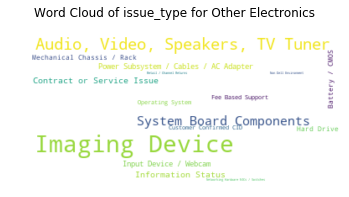

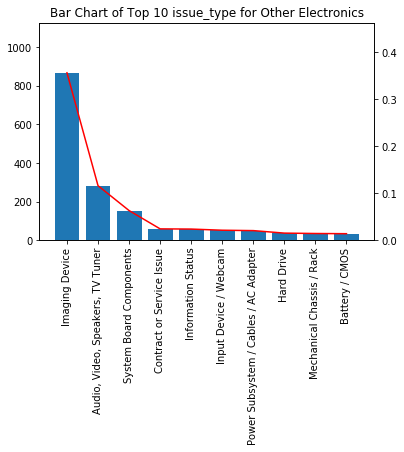

Segmentation: unknown 
('Information Status', (3, 0.2))
('Operating System', (3, 0.2))
('Fee Based Support', (3, 0.2))
('Input Device / Webcam', (2, 0.13333333333333333))
('Imaging Device', (1, 0.06666666666666667))
('Hard Drive', (1, 0.06666666666666667))
('Restricted', (1, 0.06666666666666667))
('Information Request', (1, 0.06666666666666667))



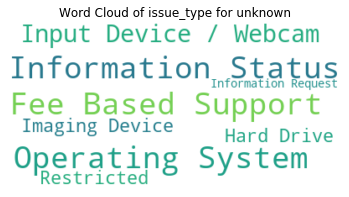

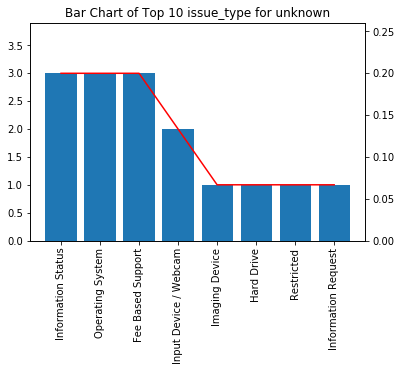

In [917]:
#Rank Issue type group by product type
ranking_QC('product_type','issue_type', rank = 10, plot_wordcloud= True, plot_bar= True)

Segmentation: Hogwarts 
('unknown', (10523, 0.19310382794436085))
('Fee Based Support', (6780, 0.12441736704958344))
('Operating System', (6207, 0.11390244797592396))
('System Board Components', (6170, 0.11322347414394245))
('Hard Drive', (4605, 0.08450471611553566))
('Audio, Video, Speakers, TV Tuner', (4031, 0.07397144639776856))
('Power Subsystem / Cables / AC Adapter', (2534, 0.04650053216867912))
('Input Device / Webcam', (2147, 0.03939883289903476))
('Mechanical Chassis / Rack', (1514, 0.02778287517891878))
('Imaging Device', (1245, 0.02284655191397218))



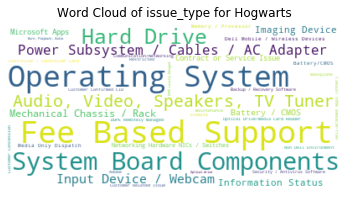

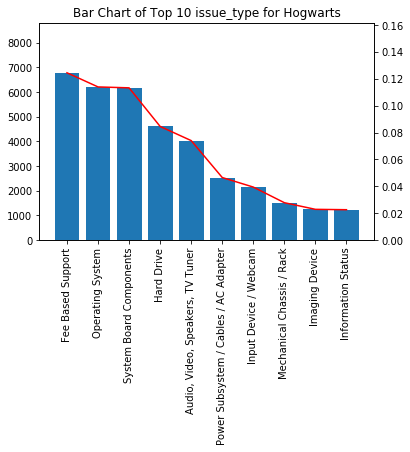

Segmentation: Middle Earth 
('System Board Components', (2866, 0.14603077550188526))
('Contract or Service Issue', (2156, 0.10985427494140426))
('Input Device / Webcam', (2146, 0.10934474676449607))
('Audio, Video, Speakers, TV Tuner', (2012, 0.10251706919392642))
('Hard Drive', (1660, 0.08458167736675838))
('Power Subsystem / Cables / AC Adapter', (1352, 0.06888820951798634))
('Fee Based Support', (1307, 0.06659533272189952))
('Operating System', (1195, 0.06088861714052787))
('Information Status', (943, 0.04804850708244166))
('Mechanical Chassis / Rack', (680, 0.03464791602975645))



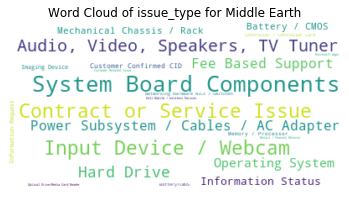

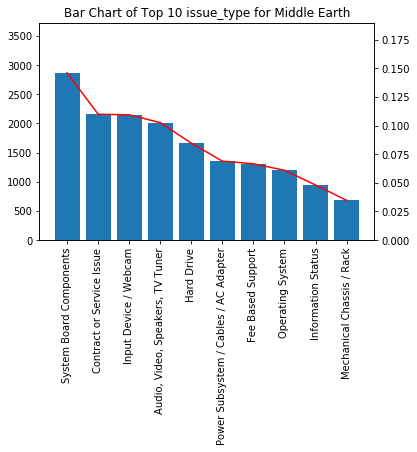

Segmentation: Milky Way 
('System Board Components', (1152, 0.2566273112051682))
('Hard Drive', (494, 0.11004678102027178))
('unknown', (443, 0.09868567609712631))
('Audio, Video, Speakers, TV Tuner', (438, 0.09757184228113165))
('Contract or Service Issue', (300, 0.06683002895967921))
('Input Device / Webcam', (256, 0.05702829137892627))
('Power Subsystem / Cables / AC Adapter', (199, 0.04433058587658721))
('Mechanical Chassis / Rack', (196, 0.043662285586990424))
('Information Status', (190, 0.042325685007796834))
('Customer Confirmed CID', (176, 0.03920695032301181))



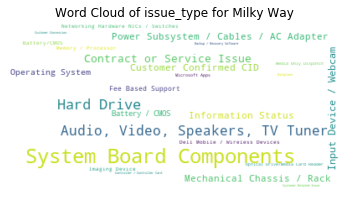

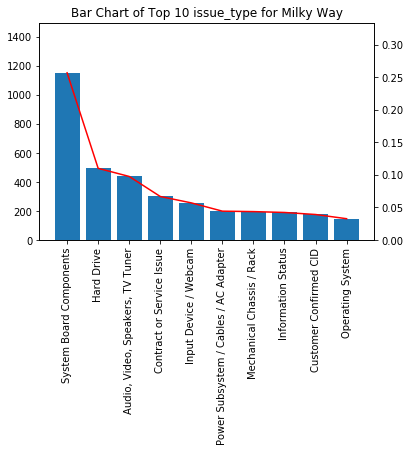

Segmentation: unknown 
('Audio, Video, Speakers, TV Tuner', (1, 0.3333333333333333))
('Operating System', (1, 0.3333333333333333))
('Networking Hardware NICs / Switches', (1, 0.3333333333333333))



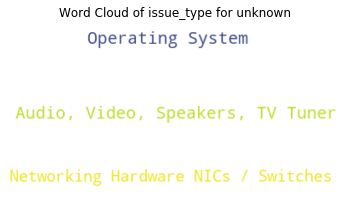

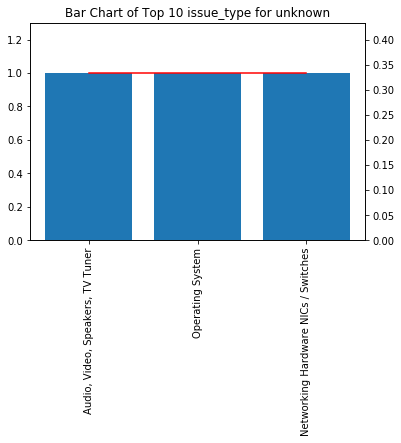

In [920]:
#Rank issue type group by Region
ranking_QC('region','issue_type', rank = 10, plot_wordcloud= True, plot_bar= True)

Segmentation: VOICE 
('unknown', (11354, 0.17158833308145685))
('Fee Based Support', (7902, 0.11941967659059997))
('System Board Components', (7165, 0.1082816986549796))
('Operating System', (6969, 0.10531963125283361))
('Hard Drive', (4965, 0.07503400332476953))
('Audio, Video, Speakers, TV Tuner', (4862, 0.07347740667976424))
('Input Device / Webcam', (3431, 0.05185129212634124))
('Power Subsystem / Cables / AC Adapter', (3371, 0.05094453679915369))
('Contract or Service Issue', (3119, 0.047136164424965994))
('Information Status', (1943, 0.02936376001209007))



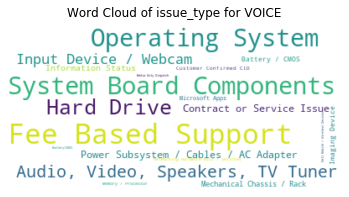

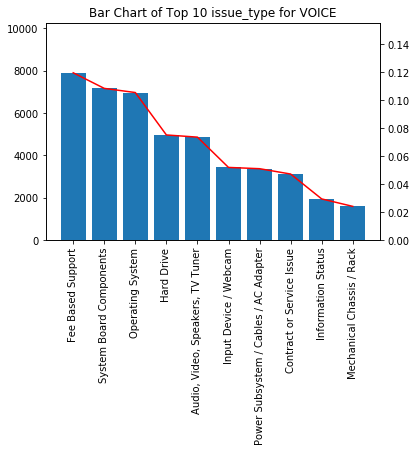

Segmentation: CHAT 
('System Board Components', (2812, 0.24876150035385705))
('Hard Drive', (1674, 0.1480891719745223))
('Audio, Video, Speakers, TV Tuner', (1425, 0.1260615711252654))
('Input Device / Webcam', (1001, 0.08855272469922151))
('Mechanical Chassis / Rack', (692, 0.06121726822363765))
('Power Subsystem / Cables / AC Adapter', (666, 0.0589171974522293))
('Operating System', (561, 0.049628450106157115))
('Battery / CMOS', (467, 0.04131280962491154))
('Information Status', (385, 0.03405874026893135))
('Fee Based Support', (267, 0.02361995753715499))



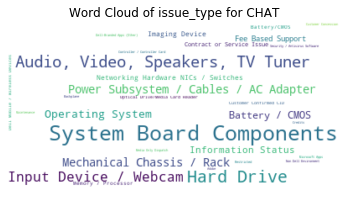

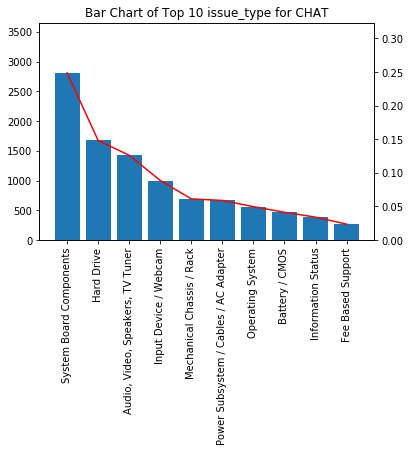

Segmentation: EMAIL 
('Audio, Video, Speakers, TV Tuner', (189, 0.1810344827586207))
('System Board Components', (188, 0.18007662835249041))
('Hard Drive', (113, 0.1082375478927203))
('Input Device / Webcam', (112, 0.10727969348659004))
('Battery / CMOS', (108, 0.10344827586206896))
('Mechanical Chassis / Rack', (107, 0.1024904214559387))
('Power Subsystem / Cables / AC Adapter', (45, 0.04310344827586207))
('Information Status', (35, 0.033524904214559385))
('Customer Confirmed CID', (23, 0.022030651340996167))
('Operating System', (19, 0.018199233716475097))



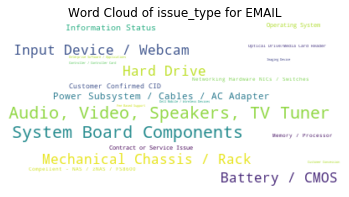

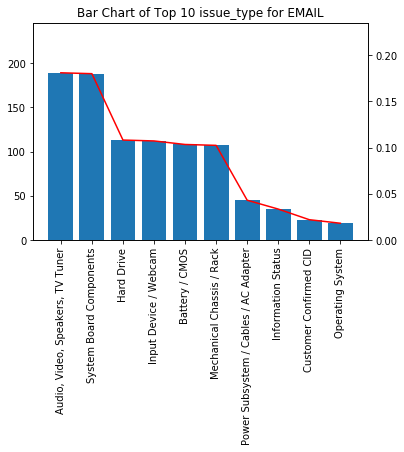

Segmentation: UNKNOWN 
('Information Request', (36, 0.3829787234042553))
('System Board Components', (23, 0.24468085106382978))
('Hard Drive', (7, 0.07446808510638298))
('Battery / CMOS', (6, 0.06382978723404255))
('Audio, Video, Speakers, TV Tuner', (6, 0.06382978723404255))
('Input Device / Webcam', (5, 0.05319148936170213))
('Power Subsystem / Cables / AC Adapter', (3, 0.031914893617021274))
('Fee Based Support', (3, 0.031914893617021274))
('Retail / Channel Returns', (1, 0.010638297872340425))
('Optical Drive/Media Card Reader', (1, 0.010638297872340425))



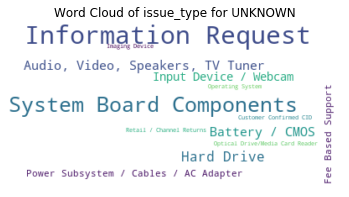

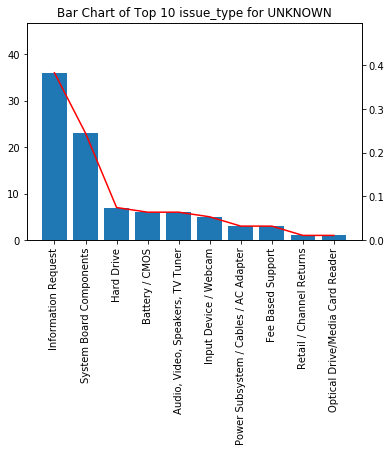

In [918]:
#Rank Issue Type group by contact type
ranking_QC('contact_type','issue_type', plot_wordcloud= True, plot_bar= True)

Segmentation: Laptops 
('unknown', (19931, 0.34696399972146785))
('Booting', (8307, 0.14461040317526636))
('LCD/Monitor', (3225, 0.056141633590975557))
('Call Logs', (2743, 0.04775085300466542))
('General Queries', (2606, 0.045365921593203816))
('System Performance', (1947, 0.0338938792563192))
('Battery', (1910, 0.03324977369263979))
('Internet/Wireless', (1653, 0.028775851263839566))
('Keyboard', (1653, 0.028775851263839566))
('Physical Damage', (1547, 0.026930575865190445))



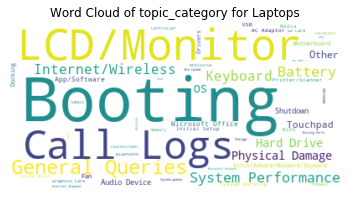

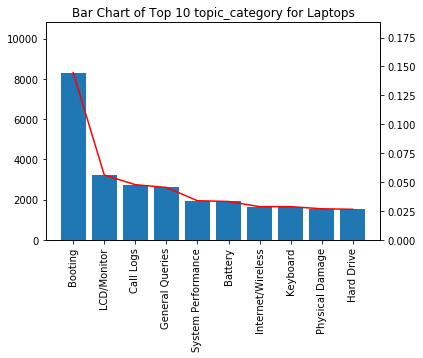

Segmentation: Desktops 
('unknown', (4620, 0.2468080559858967))
('Booting', (3675, 0.19632458998878144))
('Hard Drive', (1364, 0.0728671403386933))
('Call Logs', (955, 0.05101768256851327))
('LCD/Monitor', (836, 0.044660505368876544))
('System Performance', (715, 0.0381964848549602))
('General Queries', (653, 0.03488434211229232))
('Other', (612, 0.03269405416956034))
('OS', (610, 0.032587210855280734))
('Internet/Wireless', (500, 0.02671082856990224))



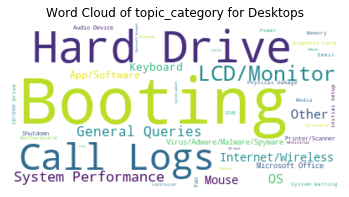

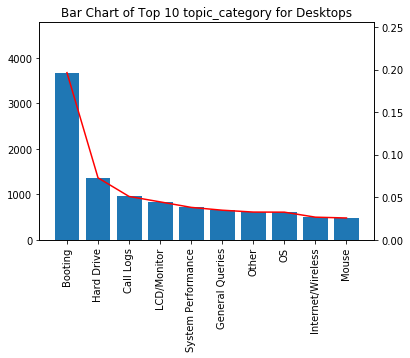

Segmentation: Other Electronics 
('unknown', (1429, 0.5870994248151191))
('Internet/Wireless', (269, 0.11051766639276911))
('LCD/Monitor', (133, 0.05464256368118324))
('Printer/Scanner', (119, 0.04889071487263763))
('Booting', (110, 0.04519309778142974))
('Physical Damage', (77, 0.031635168447000823))
('General Queries', (68, 0.027937551355792935))
('Call Logs', (60, 0.024650780608052588))
('Keyboard', (24, 0.009860312243221035))
('Battery', (21, 0.008627773212818405))



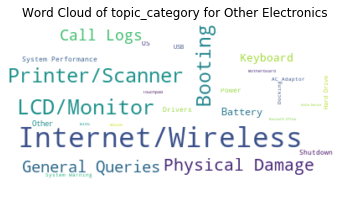

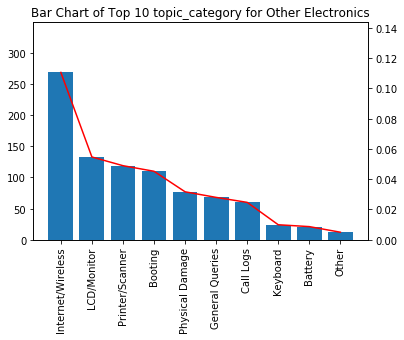

Segmentation: unknown 
('General Queries', (3, 0.2))
('unknown', (3, 0.2))
('Booting', (3, 0.2))
('Keyboard', (2, 0.13333333333333333))
('OS', (1, 0.06666666666666667))
('Printer/Scanner', (1, 0.06666666666666667))
('Call Logs', (1, 0.06666666666666667))
('Microsoft Office', (1, 0.06666666666666667))



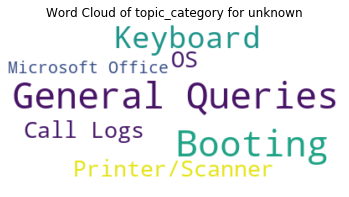

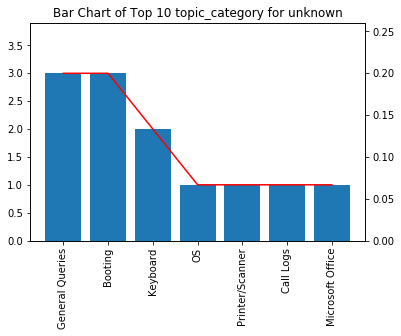

In [1059]:
#Rank Topic by Product Type
ranking_QC('product_type','topic_category', plot_wordcloud= True, plot_bar= True)

Segmentation: VOICE 
('unknown', (23466, 0.3546320084630497))
('Booting', (9777, 0.14775578056521083))
('Call Logs', (3446, 0.05207798095813813))
('LCD/Monitor', (3191, 0.04822427081759105))
('General Queries', (3049, 0.046078283209913855))
('System Performance', (2312, 0.03494030527429349))
('Internet/Wireless', (2094, 0.0316457609188454))
('Hard Drive', (1833, 0.027701375245579567))
('OS', (1723, 0.026038990479069064))
('Keyboard', (1655, 0.025011334441589844))



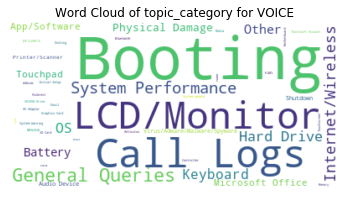

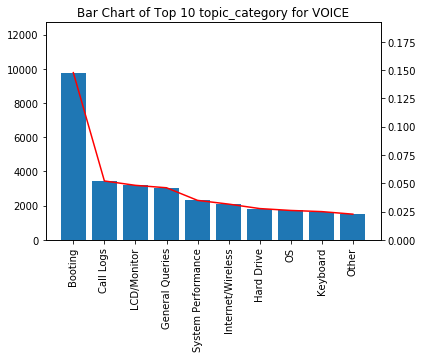

Segmentation: CHAT 
('unknown', (2285, 0.20214083510261854))
('Booting', (2167, 0.19170205237084217))
('Hard Drive', (999, 0.08837579617834394))
('LCD/Monitor', (897, 0.0793524416135881))
('Battery', (487, 0.04308209483368719))
('Physical Damage', (430, 0.038039631988676575))
('Keyboard', (425, 0.037597310686482664))
('System Performance', (323, 0.02857395612172682))
('Internet/Wireless', (303, 0.02680467091295117))
('Call Logs', (261, 0.02308917197452229))



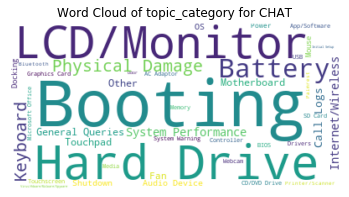

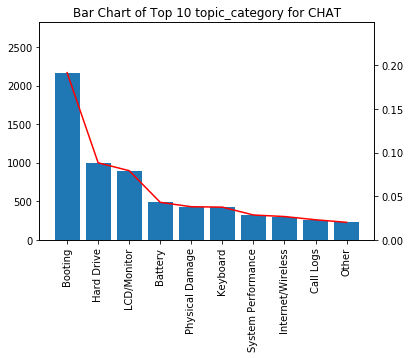

Segmentation: EMAIL 
('unknown', (222, 0.21264367816091953))
('Booting', (142, 0.1360153256704981))
('Battery', (109, 0.10440613026819924))
('LCD/Monitor', (103, 0.09865900383141762))
('Physical Damage', (68, 0.06513409961685823))
('Hard Drive', (54, 0.05172413793103448))
('Call Logs', (52, 0.04980842911877394))
('Keyboard', (43, 0.04118773946360153))
('System Performance', (35, 0.033524904214559385))
('Shutdown', (26, 0.02490421455938697))



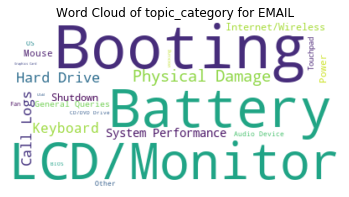

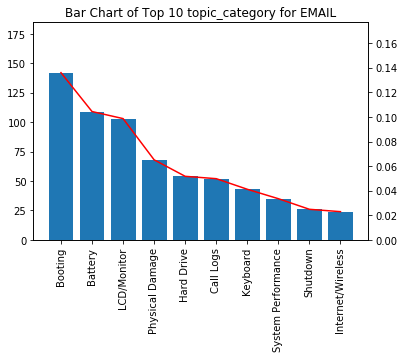

Segmentation: UNKNOWN 
('General Queries', (36, 0.3829787234042553))
('unknown', (10, 0.10638297872340426))
('Battery', (9, 0.09574468085106383))
('Booting', (9, 0.09574468085106383))
('Hard Drive', (6, 0.06382978723404255))
('Physical Damage', (4, 0.0425531914893617))
('LCD/Monitor', (3, 0.031914893617021274))
('Keyboard', (3, 0.031914893617021274))
('Motherboard', (2, 0.02127659574468085))
('Power', (2, 0.02127659574468085))



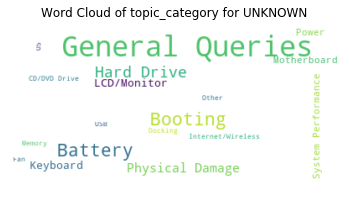

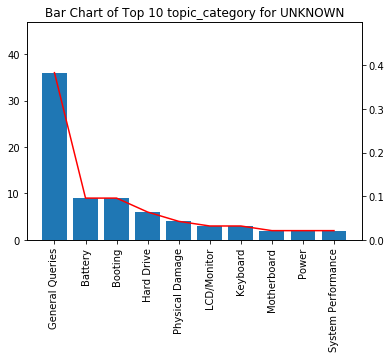

In [1060]:
#Rank Topic by contact type
ranking_QC('contact_type','topic_category', plot_wordcloud= True, plot_bar= True)

Segmentation: Hard 
('unknown', (11333, 0.2411892398059079))
('System Board Components', (8869, 0.1887503192304418))
('Hard Drive', (5693, 0.12115859368349366))
('Audio, Video, Speakers, TV Tuner', (4730, 0.10066399931897506))
('Input Device / Webcam', (3843, 0.08178683919298545))
('Power Subsystem / Cables / AC Adapter', (3455, 0.07352941176470588))
('Mechanical Chassis / Rack', (2118, 0.045075338384268325))
('Battery / CMOS', (1766, 0.0375840640163446))
('Contract or Service Issue', (1549, 0.03296586362475526))
('Imaging Device', (555, 0.011811526347152464))



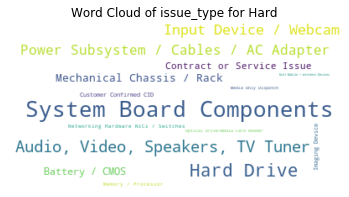

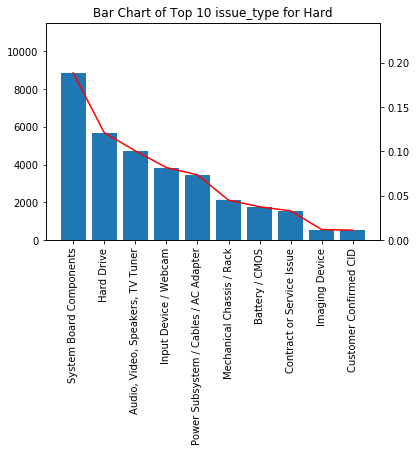

Segmentation: Soft 
('Fee Based Support', (8119, 0.25673539084239816))
('Operating System', (7466, 0.2360865165696939))
('Information Status', (2333, 0.07377308373387301))
('Audio, Video, Speakers, TV Tuner', (1752, 0.05540096129521882))
('Contract or Service Issue', (1730, 0.05470528712370352))
('System Board Components', (1319, 0.0417088287376676))
('Hard Drive', (1066, 0.03370857576524159))
('Microsoft Apps', (956, 0.030230204907665065))
('Imaging Device', (947, 0.029945610928408802))
('Input Device / Webcam', (706, 0.022324816594991147))



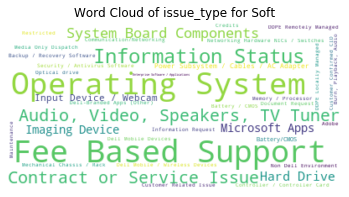

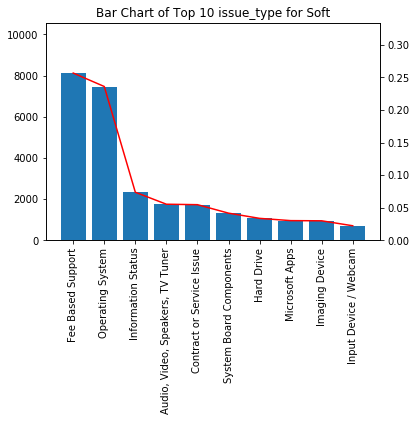

In [1073]:
#Rank Issue by repair type
ranking_QC('repair_type','issue_type', plot_wordcloud= True, plot_bar= True)

Segmentation: Hard 
('unknown', (18894, 0.4021026645100877))
('Booting', (8066, 0.17166084957861583))
('LCD/Monitor', (2831, 0.06024942538520473))
('Call Logs', (2584, 0.05499276410998553))
('Hard Drive', (2522, 0.05367327828381715))
('Keyboard', (1669, 0.03551970715927471))
('Battery', (1443, 0.030709968502596406))
('Physical Damage', (1208, 0.025708691580829147))
('System Performance', (797, 0.016961777475100026))
('Touchpad', (704, 0.01498254873584745))



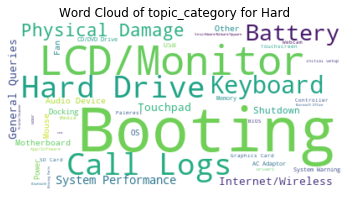

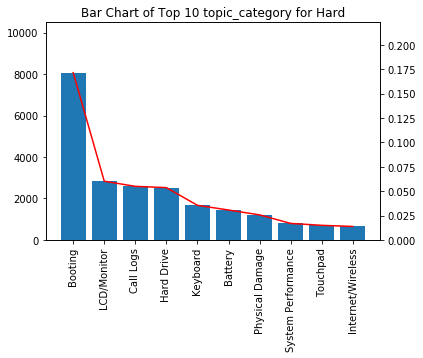

Segmentation: Soft 
('unknown', (7089, 0.22416519099418164))
('Booting', (4029, 0.12740323804705286))
('General Queries', (2681, 0.08477738426511511))
('System Performance', (1875, 0.05929041234505439))
('Internet/Wireless', (1772, 0.056033392360232734))
('OS', (1646, 0.05204907665064508))
('LCD/Monitor', (1363, 0.0431001770806982))
('Other', (1298, 0.041044776119402986))
('Call Logs', (1175, 0.03715532506956742))
('App/Software', (843, 0.026656969390336453))



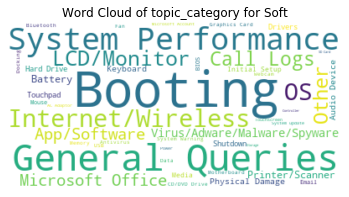

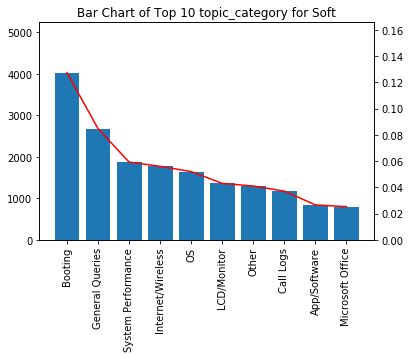

In [1072]:
# Rank topic by repair type
ranking_QC('repair_type','topic_category', plot_wordcloud= True, plot_bar= True)

In [919]:
#rank product type by manufacturing year
ranking_QC('mn_year','product_type')

Segmentation: 2017 
('Laptops', (17234, 0.765037510542904))
('Desktops', (4664, 0.20704044036045635))
('Other Electronics', (629, 0.02792204909663959))

Segmentation: 2016 
('Laptops', (12872, 0.7478068901411724))
('Desktops', (3528, 0.2049613664091094))
('Other Electronics', (812, 0.04717364782431883))
('unknown', (1, 5.8095625399407424e-05))

Segmentation: 2018 
('Laptops', (16180, 0.7568528393675742))
('Desktops', (4508, 0.2108709888670596))
('Other Electronics', (676, 0.031621292917953035))
('unknown', (14, 0.0006548788474132286))

Segmentation: 2011 
('Laptops', (451, 0.5305882352941177))
('Desktops', (392, 0.4611764705882353))
('Other Electronics', (7, 0.00823529411764706))

Segmentation: 2015 
('Laptops', (6937, 0.719680464778504))
('Desktops', (2499, 0.25925925925925924))
('Other Electronics', (203, 0.021060275962236745))

Segmentation: 2014 
('Laptops', (1910, 0.5529820497973365))
('Desktops', (1479, 0.4281991893456862))
('Other Electronics', (65, 0.018818760856977416))

Segme

Segmentation: Hogwarts 
('unknown', (20420, 0.374720152677359))
('Booting', (7691, 0.1411348038316145))
('LCD/Monitor', (2593, 0.047583220171028))
('Hard Drive', (2096, 0.03846295004954674))
('Internet/Wireless', (2082, 0.03820604103204023))
('System Performance', (2058, 0.037765625573457626))
('Call Logs', (1757, 0.03224208169706757))
('Battery', (1408, 0.025837706903512312))
('Other', (1365, 0.02504862920688516))
('OS', (1234, 0.02264469482878849))



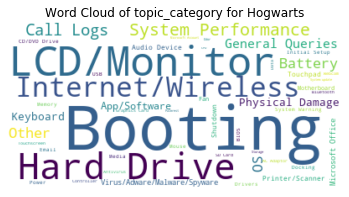

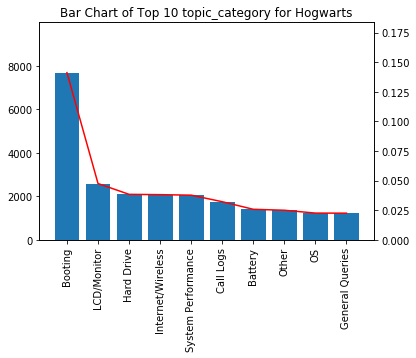

Segmentation: Middle Earth 
('unknown', (4460, 0.22724956690104964))
('Booting', (3643, 0.18562111484765106))
('General Queries', (2023, 0.10307755018852542))
('LCD/Monitor', (1336, 0.06807296443493326))
('Keyboard', (1150, 0.058595740344441045))
('Call Logs', (1050, 0.05350045857535922))
('Hard Drive', (681, 0.034698868847447266))
('OS', (618, 0.03148884133292571))
('Physical Damage', (554, 0.02822786100071334))
('System Performance', (496, 0.025272597574645877))



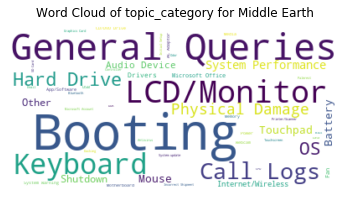

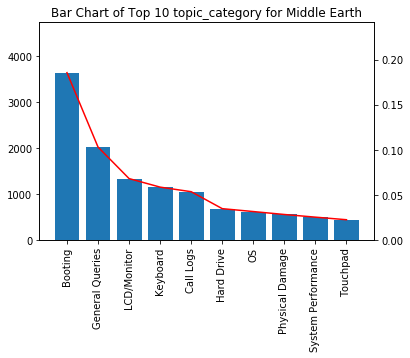

Segmentation: Milky Way 
('unknown', (1103, 0.2457117398084206))
('Call Logs', (952, 0.21207395856538205))
('Booting', (761, 0.16952550679438627))
('LCD/Monitor', (265, 0.059033192247716644))
('Physical Damage', (177, 0.039429717086210736))
('Battery', (146, 0.032523947427043884))
('System Performance', (118, 0.026286478057473826))
('Hard Drive', (115, 0.02561817776787703))
('Internet/Wireless', (96, 0.021385609267097348))
('General Queries', (77, 0.017153040766317667))



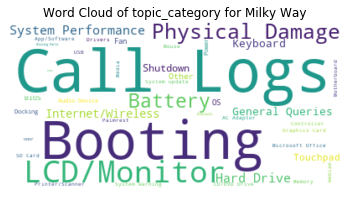

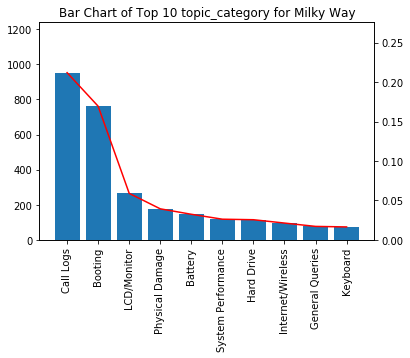

Segmentation: unknown 
('Audio Device', (1, 0.3333333333333333))
('Initial Setup', (1, 0.3333333333333333))
('Keyboard', (1, 0.3333333333333333))



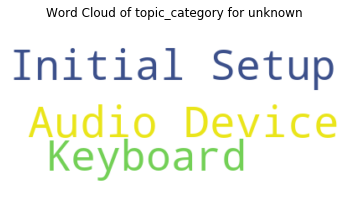

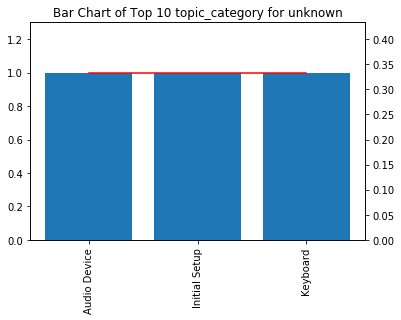

In [921]:
#Rank Topic group by region
ranking_QC('region','topic_category', rank = 10, plot_wordcloud= True, plot_bar= True)

Segmentation: 0 
('unknown', (25876, 0.33315308355864554))
('Booting', (11681, 0.15039268700914124))
('LCD/Monitor', (4126, 0.0531221835972705))
('Call Logs', (3694, 0.047560190549761815))
('General Queries', (3321, 0.042757821552723056))
('Hard Drive', (2882, 0.03710570361787048))
('System Performance', (2622, 0.033758207802240245))
('Internet/Wireless', (2394, 0.03082271147161066))
('Keyboard', (2125, 0.027359340800824))
('Battery', (1930, 0.024848718939101327))



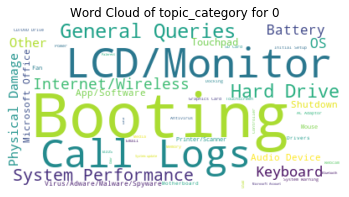

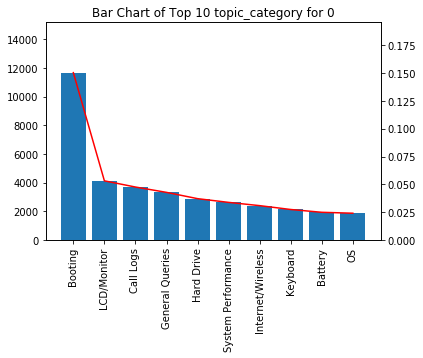

Segmentation: 1 
('Booting', (414, 0.4394904458598726))
('unknown', (107, 0.11358811040339703))
('LCD/Monitor', (68, 0.07218683651804671))
('Call Logs', (65, 0.06900212314225053))
('System Performance', (50, 0.05307855626326964))
('Internet/Wireless', (28, 0.029723991507430998))
('OS', (25, 0.02653927813163482))
('Shutdown', (24, 0.025477707006369428))
('Other', (22, 0.02335456475583864))
('Battery', (16, 0.016985138004246284))



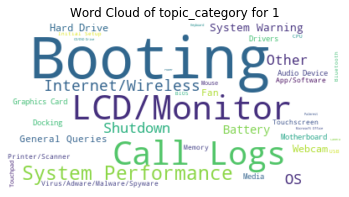

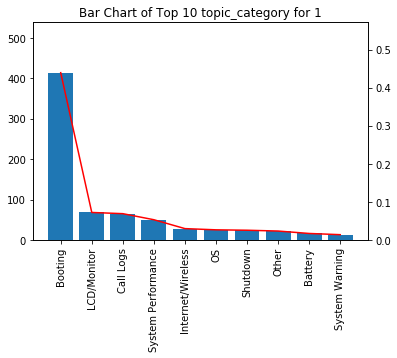

In [1102]:
#rank topic by manager flag
ranking_QC('contact_manager_flg','topic_category', plot_wordcloud= True, plot_bar= True)

In [734]:
#Topic Type Frequency QC
total_line = len(df)
topic_type_dict = dict(zip(collections.Counter(df['topic_category']).keys(), tuple(zip(collections.Counter(df['topic_category']).values(), \
          np.array(list(collections.Counter(df['topic_category']).values()))/total_line))))
srt2 = sorted(topic_type_dict.items(), key = lambda a: a[1][0], reverse=True)
srt2[:10]

[('unknown', (25983, 0.3305220577011143)),
 ('Booting', (12095, 0.15385691751895386)),
 ('LCD/Monitor', (4194, 0.05335063349107007)),
 ('Call Logs', (3759, 0.047817127156159364)),
 ('General Queries', (3330, 0.042359945046557775)),
 ('Hard Drive', (2892, 0.03678827659899252)),
 ('System Performance', (2672, 0.03398972167099171)),
 ('Internet/Wireless', (2422, 0.030809545616445326)),
 ('Keyboard', (2126, 0.027044217167862414)),
 ('Battery', (1946, 0.02475449040858902))]

In [174]:
# Write a function to extract number for each sent and resent part
# Besides and count values, proportion values are also included

def part_count(f:str):
    str_list_part = []

    for s in list(df[f].str.lower()):
        str_list_part += str(s).split(',')

    str_list_part_edit = []

    for s in str_list_part:
        s = re.sub(r'\([0-9]\)', '', s)
        s = re.sub(r'\([0-9][0-9]\)', '', s)
        s = s.strip()
        str_list_part_edit.append(s)
        
    count_dict = collections.Counter(str_list_part_edit)
        
    total_line = len(df)
    count_dict_prop = dict(zip(count_dict.keys(), tuple(zip(count_dict.values(),\
          np.array(list(count_dict.values()))/total_line))))
        
    return sorted(count_dict_prop.items(), key = lambda a: a[1],reverse=True)

In [933]:
# Write a function to extract number for each sent and resent part
# Also be able to extract the number by different segmentation
# Besides and count values, proportion values are also included
# Bar plots generated to extract the count and proportion of the top items

def part_count_seg(segment:str,f:str,rank:int=10, plot_bar=False):
    for i in df[segment].unique():

        str_list_part = []

        for s in list(df[df[segment] ==i][f].str.lower()):
            str_list_part += str(s).split(',')

        str_list_part_edit = []

        for s in str_list_part:
            s = re.sub(r'\([0-9]\)', '', s)
            s = re.sub(r'\([0-9][0-9]\)', '', s)
            s = s.strip()
            str_list_part_edit.append(s)

        count_dict = collections.Counter(str_list_part_edit)

        total_line = len(df[df[segment] ==i])
        count_dict_prop = dict(zip(count_dict.keys(), tuple(zip(count_dict.values(),\
              np.array(list(count_dict.values()))/total_line))))
        
        srt = sorted(count_dict_prop.items(), key = lambda a: a[1],reverse=True)
        print('Segmentation:',i)
        for j in range(min(rank,len(srt))):
            print(srt[j])
        print()
        
        srt = [x for x in srt if x[0]!='unknown']
        
        if plot_bar and srt != []:
            # plot bar chart for the top rank items           
            list_count = [x[1][0] for x in srt[:rank]]
            list_perc = [x[1][1] for x in srt[:rank]]

            fig, ax = plt.subplots()
            plt.xticks(rotation = 90)
            plt.title('Bar Chart of Top '+str(rank) +' '+ f + ' for ' + i + ' in '+segment)
            ax2 = ax.twinx()
            ax.bar([x[0] for x in srt[:rank]], list_count )

            ax2.plot([x[0] for x in srt[:rank]], list_perc , color ='r')
            ax.set_ylim(0,1.3*max(list_count))
            ax2.set_ylim(0,1.3*max(list_perc))
            plt.savefig('bar_r'+str(rank)+'_'+ f +'_'+ i +'_'+ segment+'.png', bbox_inches = "tight")
            plt.show()

In [1039]:
#rank the top 10 sent part 
in_str = 'parts_sent_edit'
top_sent_parts = part_count(in_str)
top_sent_parts[0:10]

[('unknown', (35341, 0.4495624077748944)),
 ('motherboard', (13474, 0.17139876863583167)),
 ('miscellaneous', (9167, 0.11661069556810665)),
 ('documentation', (9118, 0.11598738106141555)),
 ('hard drive', (7562, 0.09619396529791889)),
 ('chassis', (6336, 0.08059838192642345)),
 ('lcd panel', (5951, 0.07570091080242203)),
 ('cables', (5743, 0.07305500432503943)),
 ('keyboard', (4022, 0.05116267236554216)),
 ('heatsink', (2622, 0.03335368646008243))]

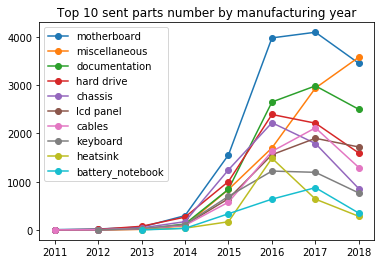

In [1051]:
#plot top 10 sent part by year
for i in [x[0] for x in top_sent_parts[1:11]]:
    df_t1 = pd.DataFrame(df[df['parts_sent_edit'].str.contains(i, case= False)].groupby('mn_year').count()['asst_id'])
    plt.plot(df_t1.index,df_t1['asst_id'] ,'-o', label = i)
plt.legend()
plt.title('Top 10 sent parts number by manufacturing year')
plt.savefig('Top_10_sent_parts_number_by_manufacturing_year.png')

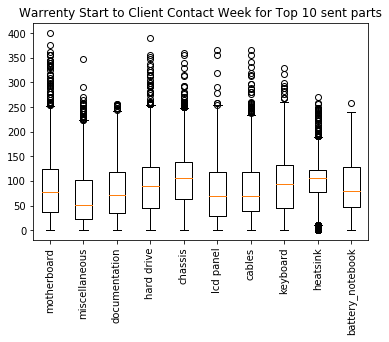

In [1057]:
#box plot to QC how soon customer report top 10 parts
list_box1 = []
for i in [x[0] for x in top_sent_parts[1:11]]:
    list_box1.append(list(df[df['parts_sent_edit'].str.contains(i, case= False)]['contact_contract_wk']))
plt.boxplot(list_box1,labels = [x[0] for x in top_sent_parts[1:11]]);
plt.xticks(rotation = 90)
plt.title('Warrenty Start to Client Contact Week for Top 10 sent parts')
plt.savefig('Warrenty_Start_to_Client_Contact_Week_for_Top_10_sent_parts.png',bbox_inches = "tight")

Segmentation: Laptops
('unknown', (24068, 0.418981965044217))
('motherboard', (10601, 0.18454494812338973))
('miscellaneous', (7786, 0.13554070050832115))
('documentation', (6904, 0.12018661653088225))
('chassis', (6127, 0.10666039969361465))
('lcd panel', (5547, 0.09656360977647796))
('cables', (5233, 0.09109741661444189))
('hard drive', (4652, 0.08098321843882737))
('keyboard', (3271, 0.05694241348095536))
('heatsink', (2467, 0.04294617366478658))



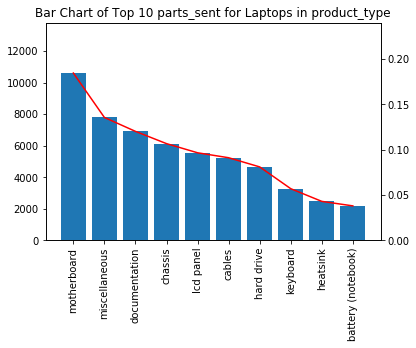

Segmentation: Desktops
('unknown', (10190, 0.5443666862546076))
('hard drive', (2869, 0.15326673433409904))
('motherboard', (2651, 0.14162081307762167))
('documentation', (2170, 0.11592499599337572))
('miscellaneous', (1167, 0.06234307388215182))
('power supply', (1113, 0.05945830439660238))
('keyboard', (583, 0.03114482611250601))
('mouse', (518, 0.02767241839841872))
('cables', (392, 0.020941289598803356))
('memory', (284, 0.015171750627704471))



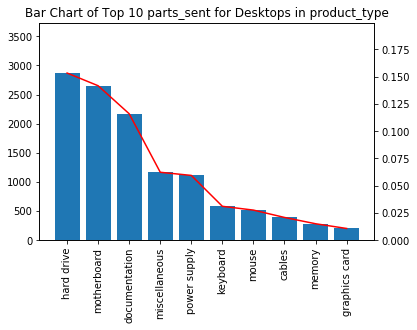

Segmentation: Other Electronics
('unknown', (1069, 0.4391947411668036))
('pcba - misc.', (294, 0.12078882497945768))
('motherboard', (222, 0.09120788824979457))
('miscellaneous', (214, 0.08792111750205424))
('lcd panel', (212, 0.08709942481511915))
('keyboard', (168, 0.06902218570254724))
('cables', (118, 0.04847986852917009))
('base unit', (116, 0.047658175842235))
('chassis', (105, 0.04313886606409203))
('electrical components', (101, 0.04149548069022186))



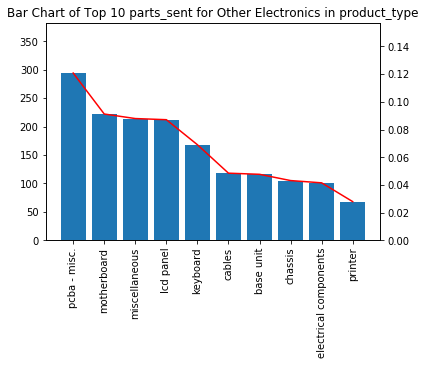

Segmentation: unknown
('unknown', (14, 0.9333333333333333))
('hard drive', (1, 0.06666666666666667))



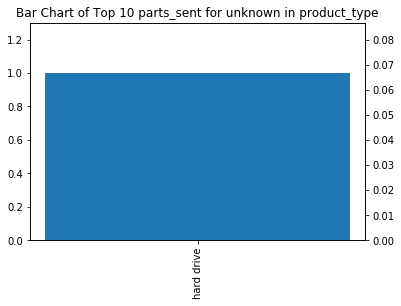

In [922]:
#Rank top 10 sent parts by product type 
part_count_seg('product_type',in_str, plot_bar=True)

In [744]:
#rank top 10 sent parts by year
part_count_seg('mn_year',in_str)

Segmentation: 2017
('unknown', (19461, 0.8638966573445199))
('motherboard', (1245, 0.05526701291783193))
('documentation', (827, 0.03671150175345141))
('cables', (651, 0.02889865494739646))
('miscellaneous', (595, 0.026412749145469882))
('chassis', (529, 0.023482931593199273))
('lcd panel', (414, 0.018377946464242907))
('hard drive', (325, 0.014427131886181027))
('keyboard', (247, 0.01096462023349758))
('heatsink', (196, 0.008700670306743019))

Segmentation: 2016
('unknown', (14194, 0.824609306919189))
('motherboard', (1162, 0.06750711671411143))
('chassis', (687, 0.0399116946493929))
('documentation', (669, 0.038865973392203566))
('cables', (536, 0.031139255214082378))
('lcd panel', (467, 0.027130657061523268))
('miscellaneous', (434, 0.025213501423342822))
('hard drive', (399, 0.023180154534363562))
('heatsink', (344, 0.019984895137396153))
('keyboard', (297, 0.017254400743624006))

Segmentation: 2018
('unknown', (19006, 0.8890448124239873))
('motherboard', (994, 0.04649639816633923)

In [967]:
#Rank top 10 resent part
in_str = 'repeat_parts_sent'
top_resent_parts = part_count(in_str)
top_resent_parts[:10]

[('unknown', (68104, 0.8663308400753066)),
 ('motherboard', (4090, 0.05202768025237877)),
 ('documentation', (2494, 0.03172543632015468)),
 ('miscellaneous', (2188, 0.027832900829389915)),
 ('chassis', (2107, 0.026802523787716886)),
 ('cables', (1882, 0.023940365338625147)),
 ('lcd panel', (1504, 0.01913193914415102)),
 ('hard drive', (1199, 0.015252124357604436)),
 ('keyboard', (987, 0.012555335063349106)),
 ('pcba - misc.', (678, 0.008624637459929781))]

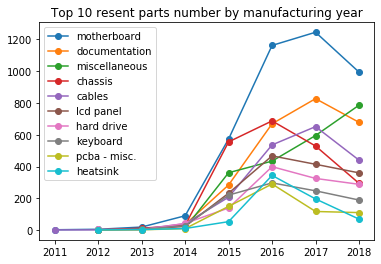

In [1053]:
#plot top 10 resent part by year
for i in [x[0] for x in top_resent_parts[1:11]]:
    df_t2 = pd.DataFrame(df[df['repeat_parts_sent'].str.contains(i, case= False)].groupby('mn_year').count()['asst_id'])
    plt.plot(df_t2.index,df_t2['asst_id'] ,'-o', label = i)
plt.legend()
plt.title('Top 10 resent parts number by manufacturing year')
plt.savefig('Top_10_resent_parts_number_by_manufacturing_year.png')

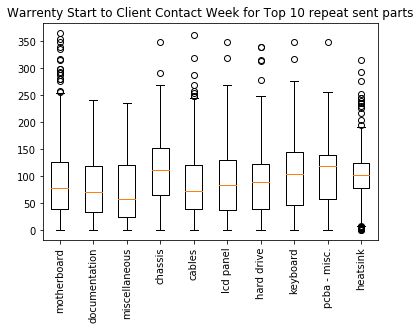

In [1058]:
#box plot to QC how soon customer report top 10 parts
list_box2 = []
for i in [x[0] for x in top_resent_parts[1:11]]:
    list_box2.append(list(df[df['repeat_parts_sent'].str.contains(i, case= False)]['contact_contract_wk']))
plt.boxplot(list_box2,labels = [x[0] for x in top_resent_parts[1:11]]);
plt.xticks(rotation = 90)
plt.title('Warrenty Start to Client Contact Week for Top 10 repeat sent parts')
plt.savefig('Warrenty_Start_to_Client_Contact_Week_for_Top_10_repeat_sent_parts.png',bbox_inches = "tight")

Segmentation: Laptops
('unknown', (48945, 0.8520472111969919))
('motherboard', (3328, 0.057934684214191214))
('chassis', (2028, 0.03530394819302277))
('documentation', (1997, 0.03476429218021029))
('miscellaneous', (1921, 0.033441264535895826))
('cables', (1628, 0.028340644801894018))
('lcd panel', (1363, 0.02372745630527122))
('hard drive', (878, 0.01528445094352761))
('keyboard', (841, 0.0146403453798482))
('heatsink', (631, 0.010984611099505605))



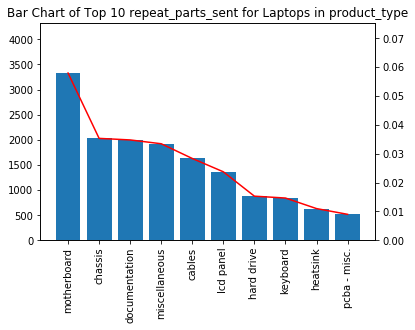

Segmentation: Desktops
('unknown', (17163, 0.9168759014904643))
('motherboard', (683, 0.03648699182648646))
('documentation', (480, 0.025642395427106147))
('hard drive', (312, 0.016667557027618997))
('miscellaneous', (210, 0.01121854799935894))
('power supply', (195, 0.010417223142261872))
('cables', (183, 0.00977616325658422))
('processor', (152, 0.00812009188525028))
('keyboard', (99, 0.005288744056840643))
('memory', (98, 0.005235322399700839))



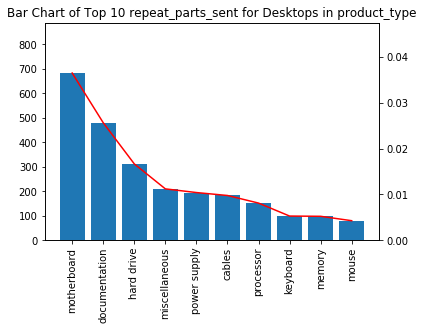

Segmentation: Other Electronics
('unknown', (1981, 0.813886606409203))
('pcba - misc.', (142, 0.05834018077239113))
('lcd panel', (82, 0.03368940016433854))
('motherboard', (79, 0.03245686113393591))
('cables', (71, 0.029170090386195564))
('miscellaneous', (57, 0.02341824157764996))
('keyboard', (47, 0.019309778142974528))
('chassis', (37, 0.015201314708299097))
('electrical components', (28, 0.011503697617091208))
('battery (notebook)', (25, 0.010271158586688579))



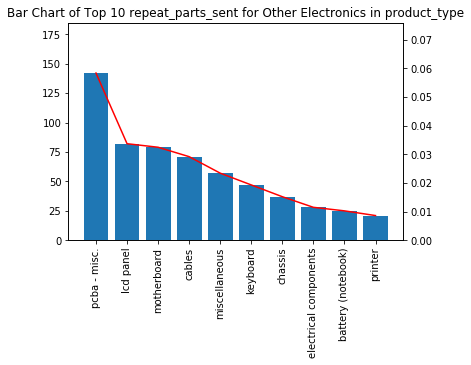

Segmentation: unknown
('unknown', (15, 1.0))



In [934]:
#Rank top 10 resent parts by product type 
part_count_seg('product_type',in_str, plot_bar=True)

In [531]:
#Prepare chi squre QC for categorical data

def my_chi_sq(df,idx:str,col:str, drop_unknown = False):
    s = df.pivot_table(values='asst_id', index=idx, columns=col, aggfunc=lambda x: len(x.unique()))
    s =s.fillna(0)
    if drop_unknown:
        if 'unknown' in s.index:
            s = s.drop('unknown')
        if 'UNKNOWN' in s.index:    
            s = s.drop('UNKNOWN')
        if 'unknown' in s.columns:
            s = s.drop('unknown', axis = 1)
        if 'UNKNOWN' in s.columns:
            s = s.drop('UNKNOWN', axis = 1)
    
    chi, p, df, expected = stats.chi2_contingency(s)
    
    print('\033[1m' + 'Contingency Table' + '\033[0m')
    print(s)
    print()
    
    s_hn = s.copy()
    s['idx_sum'] = s.sum(axis =1)
    
    for i in list(s_hn.columns):
        s_hn[i] = s_hn[i]/s['idx_sum']
        
    print('\033[1m' + 'Horizontal Proportion:' + '\033[0m')
    print(s_hn)
    print()
       
    s = s.drop('idx_sum', axis =1)
    
    for j in list(s.columns):
        s[j] = s[j]/s[j].sum()
        
    print('\033[1m' + 'Vertical Proportion:' + '\033[0m')
    print(s)
    print()
    
    print('Chi-square Stat:',chi)
    print('p value:',p)
    print('Degree of Freedoom:',df)
    print('Expected Values:',expected)

In [532]:
my_chi_sq(df,'region','product_type',True)

Contingency Table
product_type  Desktops  Laptops  Other Electronics
region                                            
Hogwarts       13633.0  38492.0             1950.0
Middle Earth    4196.0  15012.0              203.0
Milky Way        802.0   3407.0              261.0

Horizontal Proportion:
product_type  Desktops   Laptops  Other Electronics
region                                             
Hogwarts      0.252113  0.711826           0.036061
Middle Earth  0.216166  0.773376           0.010458
Milky Way     0.179418  0.762192           0.058389

Vertical Proportion:
product_type  Desktops   Laptops  Other Electronics
region                                             
Hogwarts      0.731737  0.676354           0.807788
Middle Earth  0.225216  0.263780           0.084093
Milky Way     0.043047  0.059865           0.108119

Chi-square Stat: 646.0110096432267
p value: 1.7023310494942407e-138
Degree of Freedoom: 4
Expected Values: [[12923.58926831 39476.91422084  1674.49651085]
 [ 46

In [533]:
my_chi_sq(df,'repair_type','product_type',True)

Contingency Table
product_type  Desktops  Laptops  Other Electronics
repair_type                                       
Hard              9178    35960               1466
Soft              9472    21098                949

Horizontal Proportion:
product_type  Desktops   Laptops  Other Electronics
repair_type                                        
Hard          0.196936  0.771608           0.031457
Soft          0.300517  0.669374           0.030109

Vertical Proportion:
product_type  Desktops   Laptops  Other Electronics
repair_type                                        
Hard          0.492118  0.630236           0.607039
Soft          0.507882  0.369764           0.392961

Chi-square Stat: 1115.218977009688
p value: 6.81202268337568e-243
Degree of Freedoom: 2
Expected Values: [[11125.59169515 34037.74857596  1440.65972889]
 [ 7524.40830485 23020.25142404   974.34027111]]


In [534]:
my_chi_sq(df,'region','contact_type',True)

Contingency Table
contact_type    CHAT  EMAIL    VOICE
region                              
Hogwarts      9936.0  115.0  44016.0
Middle Earth   974.0  878.0  17539.0
Milky Way      384.0   47.0   4038.0

Horizontal Proportion:
contact_type      CHAT     EMAIL     VOICE
region                                    
Hogwarts      0.183772  0.002127  0.814101
Middle Earth  0.050229  0.045279  0.904492
Milky Way     0.085925  0.010517  0.903558

Vertical Proportion:
contact_type      CHAT     EMAIL     VOICE
region                                    
Hogwarts      0.879759  0.110577  0.671047
Middle Earth  0.086240  0.844231  0.267391
Milky Way     0.034000  0.045192  0.061561

Chi-square Stat: 4024.3368586088086
p value: 0.0
Degree of Freedoom: 4
Expected Values: [[ 7835.95798632   721.56864758 45509.4733661 ]
 [ 2810.34755605   258.7888665  16321.86357745]
 [  647.69445763    59.64248592  3761.66305645]]


In [535]:
my_chi_sq(df,'contact_manager_flg','contact_type',True)

Contingency Table
contact_type            CHAT   EMAIL    VOICE
contact_manager_flg                          
0                    11174.0  1035.0  64783.0
1                      120.0     5.0    817.0

Horizontal Proportion:
contact_type             CHAT     EMAIL     VOICE
contact_manager_flg                              
0                    0.145132  0.013443  0.841425
1                    0.127389  0.005308  0.867304

Vertical Proportion:
contact_type             CHAT     EMAIL     VOICE
contact_manager_flg                              
0                    0.989375  0.995192  0.987546
1                    0.010625  0.004808  0.012454

Chi-square Stat: 7.377324439111259
p value: 0.025005431453886052
Degree of Freedoom: 2
Expected Values: [[1.11574877e+04 1.02742936e+03 6.48070829e+04]
 [1.36512280e+02 1.25706367e+01 7.92917084e+02]]


In [536]:
my_chi_sq(df,'contact_manager_flg','diagnostics',False)

Contingency Table
diagnostics          Effective_Usage  InEffective_Usage  Not_Considered  \
contact_manager_flg                                                       
0                            17042.0             5590.0          1943.0   
1                              894.0               48.0             0.0   

diagnostics          Not_USED  
contact_manager_flg            
0                     52557.0  
1                         0.0  

Horizontal Proportion:
diagnostics          Effective_Usage  InEffective_Usage  Not_Considered  \
contact_manager_flg                                                       
0                           0.220946           0.072473        0.025191   
1                           0.949045           0.050955        0.000000   

diagnostics          Not_USED  
contact_manager_flg            
0                     0.68139  
1                     0.00000  

Vertical Proportion:
diagnostics          Effective_Usage  InEffective_Usage  Not_Considered  \
con

In [680]:
# Prepare ANOVA QC for categorical vs continuous data

def my_anova_one_way(df,cont:str,cate:str):
    a = []
    pos = 0
    for i in list(df[cate].unique()):
        pos+=1
        a.append(df[df[cate] == i][cont])
    
    plt.boxplot(a, labels=list(df[cate].unique()))
    plt.ylabel(cont, rotation = 90)
        
    print(stats.f_oneway(*a))

F_onewayResult(statistic=502.75579461019544, pvalue=1e-323)


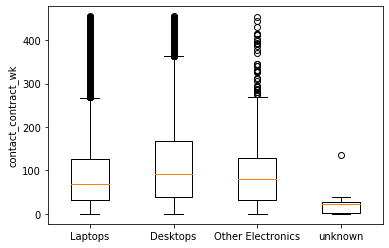

In [681]:
my_anova_one_way(df,'contact_contract_wk','product_type')

F_onewayResult(statistic=29.963889263004358, pvalue=4.4150894163522214e-08)


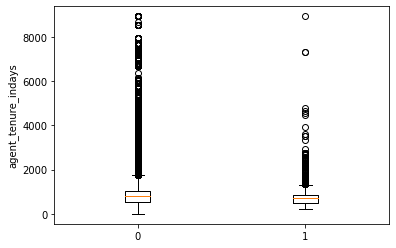

In [684]:
my_anova_one_way(df,'agent_tenure_indays','contact_manager_flg')

F_onewayResult(statistic=206.2860583681137, pvalue=2.751771584357927e-133)


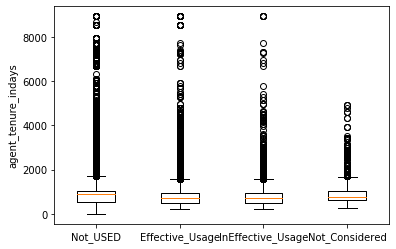

In [682]:
my_anova_one_way(df,'agent_tenure_indays','diagnostics')

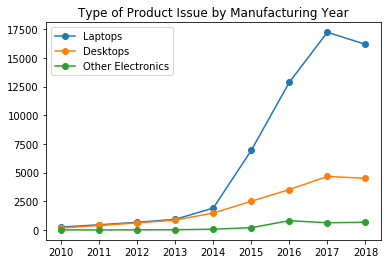

In [1105]:
#plot Type of Product Issue by Manufacturing Year
for i in ['Laptops', 'Desktops', 'Other Electronics']:
    df_t3 = pd.DataFrame(df[df['product_type']==i].groupby('mn_year').count()['asst_id'])
    plt.plot(df_t3.index,df_t3['asst_id'] ,'-o', label = i)
plt.legend()
plt.title('Type of Product Issue by Manufacturing Year')
plt.savefig('Type_of_Product_Issue_number_by_manufacturing_year.png')

In [595]:
df['diagnostics'].unique()

array(['Not_USED', 'Effective_Usage', 'InEffective_Usage',
       'Not_Considered'], dtype=object)

C:\Users\pzhen\Machine_Learning\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pzhen\Machine_Learning\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\pzhen\Machine_Learning\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\pzhen\Machine_Learning\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


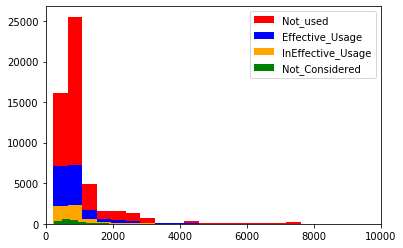

In [1082]:
# Agent Tenure in days
#plt.hist(df[df['agent_tenure_indays'] !=0]['agent_tenure_indays'].astype(int), bins =20, color='pink', label = 'All');
plt.hist(df[df['agent_tenure_indays'] !=0][df['diagnostics'] == 'Not_USED']['agent_tenure_indays'].astype(int), bins =20, color= 'r', label = 'Not_used');
plt.hist(df[df['agent_tenure_indays'] !=0][df['diagnostics'] == 'Effective_Usage']['agent_tenure_indays'].astype(int), bins =20, color='b', label = 'Effective_Usage');
plt.hist(df[df['agent_tenure_indays'] !=0][df['diagnostics'] == 'InEffective_Usage']['agent_tenure_indays'].astype(int), bins =20, color='orange', label = 'InEffective_Usage');
plt.hist(df[df['agent_tenure_indays'] !=0][df['diagnostics'] == 'Not_Considered']['agent_tenure_indays'].astype(int), bins =20, color='g', label = 'Not_Considered');

plt.xlim([0,10000])
#plt.yscale('log')
plt.legend()
plt.savefig('agent_diagnostic_bar_lin.png')

In [ ]:
#Generate plot to extract the diagnostic usage by different tenure day group (by every 2000 days)

In [625]:
a1 = collections.Counter(df.loc[(df['agent_tenure_indays'] !=0) & (df['agent_tenure_indays'] <2000)]['diagnostics'])
a1_sum = sum(list(a1.values()))
a1 = dict(zip(a1.keys(), tuple(zip(a1.values(),np.array(list(a1.values()))/a1_sum))))
a1

{'Not_USED': (48335, 0.6681642244954382),
 'Effective_Usage': (16883, 0.23338401990599944),
 'InEffective_Usage': (5294, 0.07318219518938347),
 'Not_Considered': (1828, 0.025269560409178878)}

In [627]:
a2 = collections.Counter(df.loc[(df['agent_tenure_indays'] >= 2000) & (df['agent_tenure_indays'] < 4000)]['diagnostics'])
a2_sum = sum(list(a2.values()))
a2 = dict(zip(a2.keys(), tuple(zip(a2.values(),np.array(list(a2.values()))/a2_sum))))
a2

{'Not_USED': (3583, 0.7325700265794316),
 'Effective_Usage': (892, 0.18237579227151912),
 'InEffective_Usage': (309, 0.06317726436311592),
 'Not_Considered': (107, 0.021876916785933346)}

In [628]:
a3 = collections.Counter(df.loc[(df['agent_tenure_indays'] >= 4000) & (df['agent_tenure_indays'] < 6000)]['diagnostics'])
a3_sum = sum(list(a3.values()))
a3 = dict(zip(a3.keys(), tuple(zip(a3.values(),np.array(list(a3.values()))/a3_sum))))
a3

{'Not_USED': (706, 0.8257309941520468),
 'Effective_Usage': (111, 0.12982456140350876),
 'InEffective_Usage': (29, 0.03391812865497076),
 'Not_Considered': (9, 0.010526315789473684)}

In [629]:
a4 = collections.Counter(df.loc[(df['agent_tenure_indays'] >= 6000) & (df['agent_tenure_indays'] < 10000)]['diagnostics'])
a4_sum = sum(list(a4.values()))
a4 = dict(zip(a4.keys(), tuple(zip(a4.values(),np.array(list(a4.values()))/a4_sum))))
a4

{'Not_USED': (449, 0.8667953667953668),
 'Effective_Usage': (57, 0.11003861003861004),
 'InEffective_Usage': (12, 0.023166023166023165)}

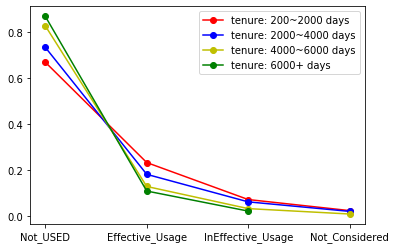

In [1080]:
plt.plot(list(a1.keys()),[x[1] for x in a1.values()], 'ro-', label = 'tenure: 200~2000 days')
plt.plot(list(a2.keys()),[x[1] for x in a2.values()], 'bo-', label = 'tenure: 2000~4000 days')
plt.plot(list(a3.keys()),[x[1] for x in a3.values()], 'yo-', label = 'tenure: 4000~6000 days')
plt.plot(list(a4.keys()),[x[1] for x in a4.values()], 'go-', label = 'tenure: 6000+ days')
plt.legend()
plt.savefig('tenure_group_diagnostic_percentage.png')

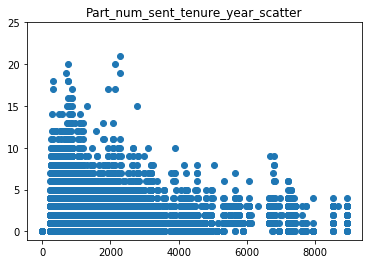

In [1090]:
#Part sent by agents by tenure days
plt.scatter(df['agent_tenure_indays'],df['parts_ct'])
plt.ylim([-1,25])
plt.title('Part_num_sent_tenure_year_scatter')
plt.savefig('Part_num_sent_tenure_year_scatter.png')

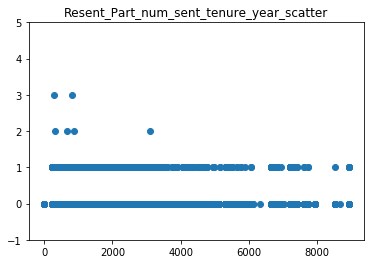

In [1092]:
#Part resent by agents by tenure days
plt.scatter(df['agent_tenure_indays'],df['repeat_ct'])
plt.ylim([-1,5])
plt.title('Resent_Part_num_sent_tenure_year_scatter')
plt.savefig('Resent_Part_num_sent_tenure_year_scatter.png')

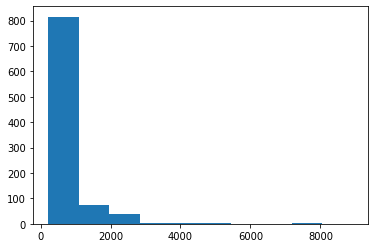

In [1096]:
#Plot distribtion of contact manager by tenure days
plt.hist(df[df['contact_manager_flg'] ==1]['agent_tenure_indays'])
#plt.yscale('log')
plt.savefig('tenure_days_contact_manager_linear.png')

In [687]:
df['tenure_group'] = df['agent_tenure_indays']//2000 + 1

In [703]:
d1 = df.pivot_table(values='asst_id', index='contact_manager_flg', columns='tenure_group', aggfunc=lambda x: len(x.unique()))
d1

tenure_group,1.0,2.0,3.0,4.0,5.0
contact_manager_flg,,,,,
0,70906,4840,849,443,65
1,891,44,4,2,1


In [704]:
for i in d1.columns:
    d1[i] = d1[i]/d1[i].sum()
d1

tenure_group,1.0,2.0,3.0,4.0,5.0
contact_manager_flg,,,,,
0,0.98759,0.990991,0.995311,0.995506,0.984848
1,0.01241,0.009009,0.004689,0.004494,0.015152


In [941]:
sm = sum(collections.Counter(df[df['parts_sent'].str.contains('Motherboard')]['product_type']).values())
for i,v in collections.Counter(df[df['parts_sent'].str.contains('Motherboard')]['product_type']).items():
    print(i,v/sm)

Desktops 0.19674929493839988
Laptops 0.7867745287219831
Other Electronics 0.01647617633961704


In [1070]:
#Export cleaned data for Graph DB exploration
df.to_csv('data_bk3_af_drop_time.csv', header='fieldname', line_terminator='\n', index=False)